<a href="https://colab.research.google.com/github/risehi/data-analysis-colab-notebooks/blob/main/twitter_data_topic_trasformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==4.31.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.9 MB/s eta 0:00:00


In [6]:
from transformers import pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("/content/drive/MyDrive/twitter-data-ms/meta_tweets_data.csv")

In [17]:
classifier = pipeline("zero-shot-classification", model="cross-encoder/nli-roberta-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [18]:
candidate_labels = [
    "technology", "politics", "sports", "entertainment", "business", "finance",
    "health", "science", "education", "travel", "food", "fashion",
    "music", "art", "literature", "gaming", "photography", "design",
    "environment", "social issues", "current events", "history", "philosophy"
]


In [19]:
def classify_topic(text, candidate_labels):
  result = classifier(text, candidate_labels)
  return result['labels'][0]

In [20]:
df['Topics'] = df['Tweets'].apply(lambda x: classify_topic(x, candidate_labels) if pd.notna(x) else np.nan)

In [12]:
def extract_unique_values(df, column_name):
    unique_values = set()
    for index, row in df.iterrows():
        if pd.notna(row[column_name]):
            values = row[column_name].strip('[]').split(',')
            unique_values.update(values)

    column_prefix = f"{column_name[:2]}{column_name[-1:]}-"
    new_column_names = []
    for value in unique_values:
        clean_value = value.strip(" '\"")
        new_column_name = column_prefix + clean_value
        new_column_names.append(new_column_name)
        df[new_column_name] = df[column_name].apply(lambda x: x.strip('[]').split(',').count(value) if pd.notna(x) else 0)

    return df, new_column_names

In [22]:
df, unique_values = extract_unique_values(df, 'Topics')

In [23]:
unique_values

['Tos-technology',
 'Tos-current events',
 'Tos-entertainment',
 'Tos-photography']

In [28]:
def count_items(df, values):
    return {name: df[name].eq(1).sum() for name in values}

In [29]:
viz_data = count_items(df, unique_values)

In [30]:
# Sort the viz_data dictionary by values in descending order
sorted_viz_data = dict(sorted(viz_data.items(), key=lambda item: item[1], reverse=True))


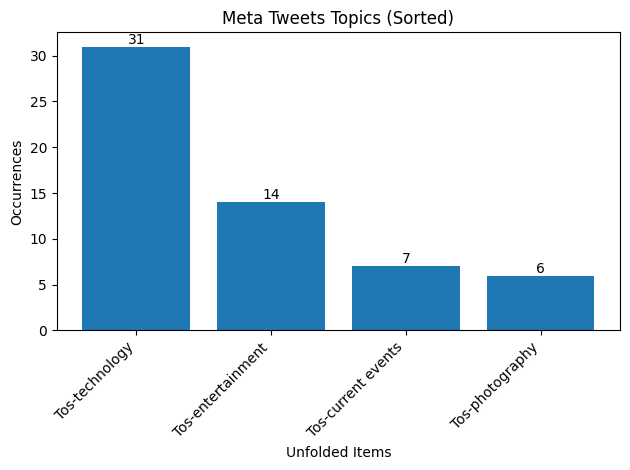

In [35]:
labels = [key for key in sorted_viz_data.keys() if key != 'NaN']
values = [sorted_viz_data[key] for key in labels]

# Recreate the bar chart with sorted data
bars = plt.bar(labels, values)

plt.bar_label(bars)
plt.xlabel('Unfolded Items')
plt.ylabel('Occurrences')
plt.title('Meta Tweets Topics (Sorted)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [37]:
df

,Timestamp,Tweets,Hashtags,Mentions,Topics,Tos-technology,Tos-current events,Tos-entertainment,Tos-photography
0,2024-06-11T22:06:17.000Z,You all imagined these dazzling dream-like sce...,['imaginedwithai'],['aiatmeta'],entertainment,0,0,1,0
1,2024-06-11T22:06:17.000Z,What have you imagined recently? Drop your lat...,NaN,NaN,photography,0,0,0,1
2,2024-06-03T18:00:14.000Z,Save the date \n\nMeta Connect 2024 is happ...,NaN,NaN,current events,0,1,0,0
3,2024-06-11T22:06:17.000Z,You all imagined these dazzling dream-like sce...,['imaginedwithai'],['aiatmeta'],entertainment,0,0,1,0
4,2024-06-11T22:06:17.000Z,What have you imagined recently? Drop your lat...,NaN,NaN,photography,0,0,0,1
...,...,...,...,...,...,...,...,...,...
59,2024-04-23T14:55:41.000Z,NaN,NaN,NaN,NaN,0,0,0,0
60,2024-04-23T14:55:42.000Z,NaN,NaN,NaN,NaN,0,0,0,0
61,2024-04-23T14:55:42.000Z,NaN,NaN,NaN,NaN,0,0,0,0
62,2024-05-22T14:24:27.000Z,Lots of fun to come on \n@MetaQuestVR\n,NaN,['MetaQuestVR'],entertainment,0,0,1,0


In [36]:
df.to_csv("/content/drive/MyDrive/twitter-data-ms/meta_tweets_data_mod.csv", index=False)